In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

Dataset Exploratory Analysis

The dataset was provided during a collaborative research project between Worldline and Machine Learning Group of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

Data Understanding

In [2]:
df = pd.read_csv('creditcard.csv')
df.shape

(284807, 31)

The dataset has 31 features, which is quite large to conduct research effectively. Perhaps finding ways to reduce the dataset dimensions would benefit the project as well as the researching model better.

It is also noteworthy that the dataset features has been encrypted due to privacy concerns as the dataset represents the transactions made by credit cards in September 2013 by European cardholders.

In [13]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


It seems that the dataset is sorted chronologically as the transactions happened as time went on, some would conincide with each other as is expected in real world scenarios. It is sensible to deem that the features "Time" and "Amount" are much less relevant to the desired model as frauds can happen at any time and any magnitude during the day.

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


There are in total 284,807 transactions or datapoints in this dataset. It is also learned that the actual fraudulent transactions in this dataset is extremely underrepresented as the mean value for feature Class is extremely close to 0 (meaning there are a lot of 0s and so few 1s). The imbalance of the dataset is heavily concerning as the relationship displayed in this dataset between the two types of datapoints are not so credible.

Data Preparation

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

The datatype of the dataset is converted to be efficient for model training processes, which is beneficial to the training time of the model.

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
print(df.Class.value_counts())
print(df.duplicated().sum())

Class
0    284315
1       492
Name: count, dtype: int64
1081


In [13]:
dropped_dup_df = df.drop_duplicates()
print(dropped_dup_df.Class.value_counts())

Class
0    283253
1       473
Name: count, dtype: int64


Dropping duplicates might impact the weight the duplicated points has on the dataset. However, the number of dropped positive class is significantly less than the number of dropped negative class. This highlights the irrelevance of duplication in the dataset to the relationship between two classes.

Feature Understanding

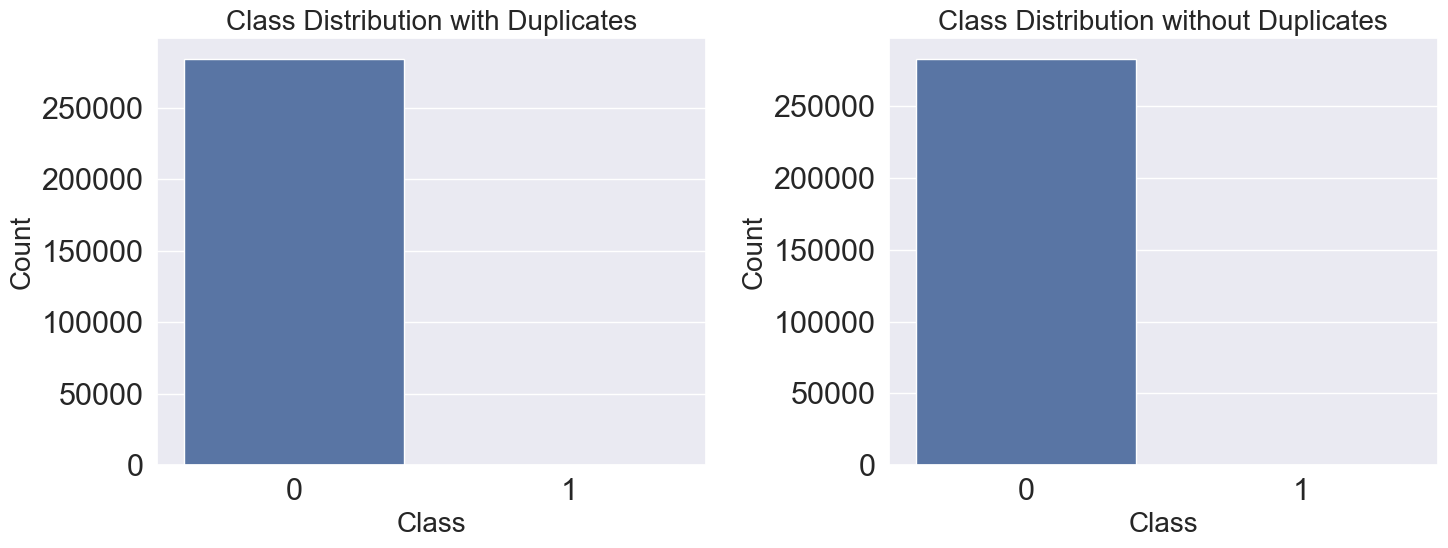

In [22]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(data=df, x='Class', ax=ax1)
sns.countplot(data=dropped_dup_df, x='Class', ax=ax2)

ax1.set_title('Class Distribution with Duplicates', fontsize=20)
ax1.set_xlabel('Class', fontsize=20)
ax1.set_ylabel('Count', fontsize=20)

ax2.set_title('Class Distribution without Duplicates', fontsize=20)
ax2.set_xlabel('Class', fontsize=20)
ax2.set_ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

Pairplotting the 5-relevant features to better understand how feature engineering change the dataset. Plotting all features can be done, however, the runtime of such operation is super costly.

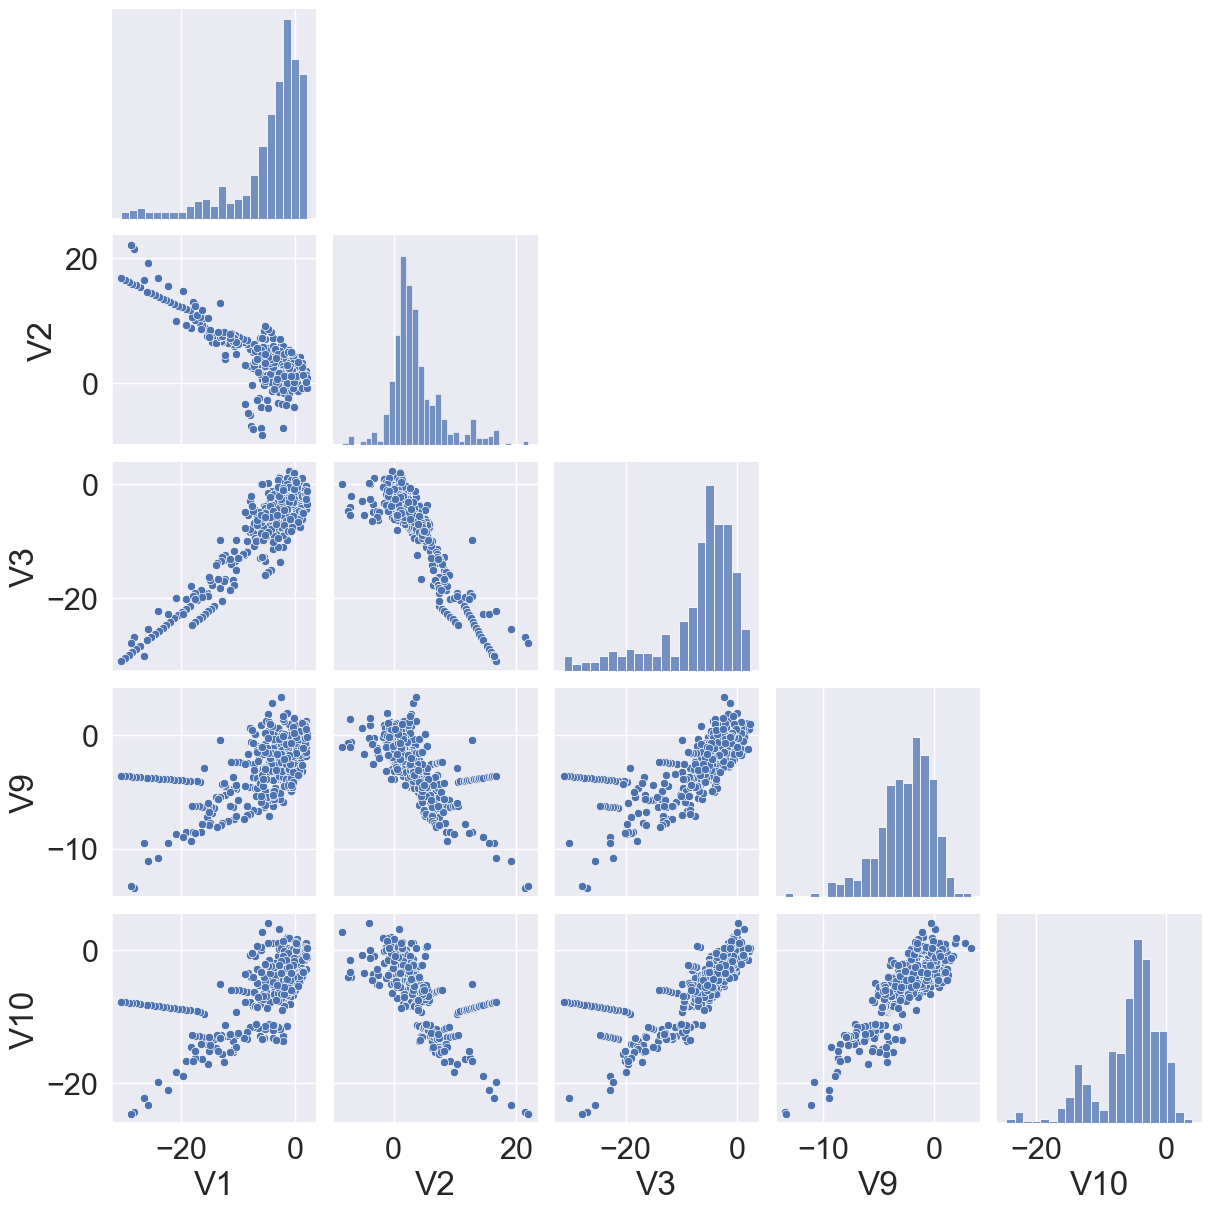

In [26]:
positive_df = df[df['Class'] == 1]
sns.pairplot(positive_df,
             vars=['V1','V2','V3','V9','V10'],
             corner=True)

Text(0.5, 0.98, 'Pairplot of Positive Class Features without Duplicates')

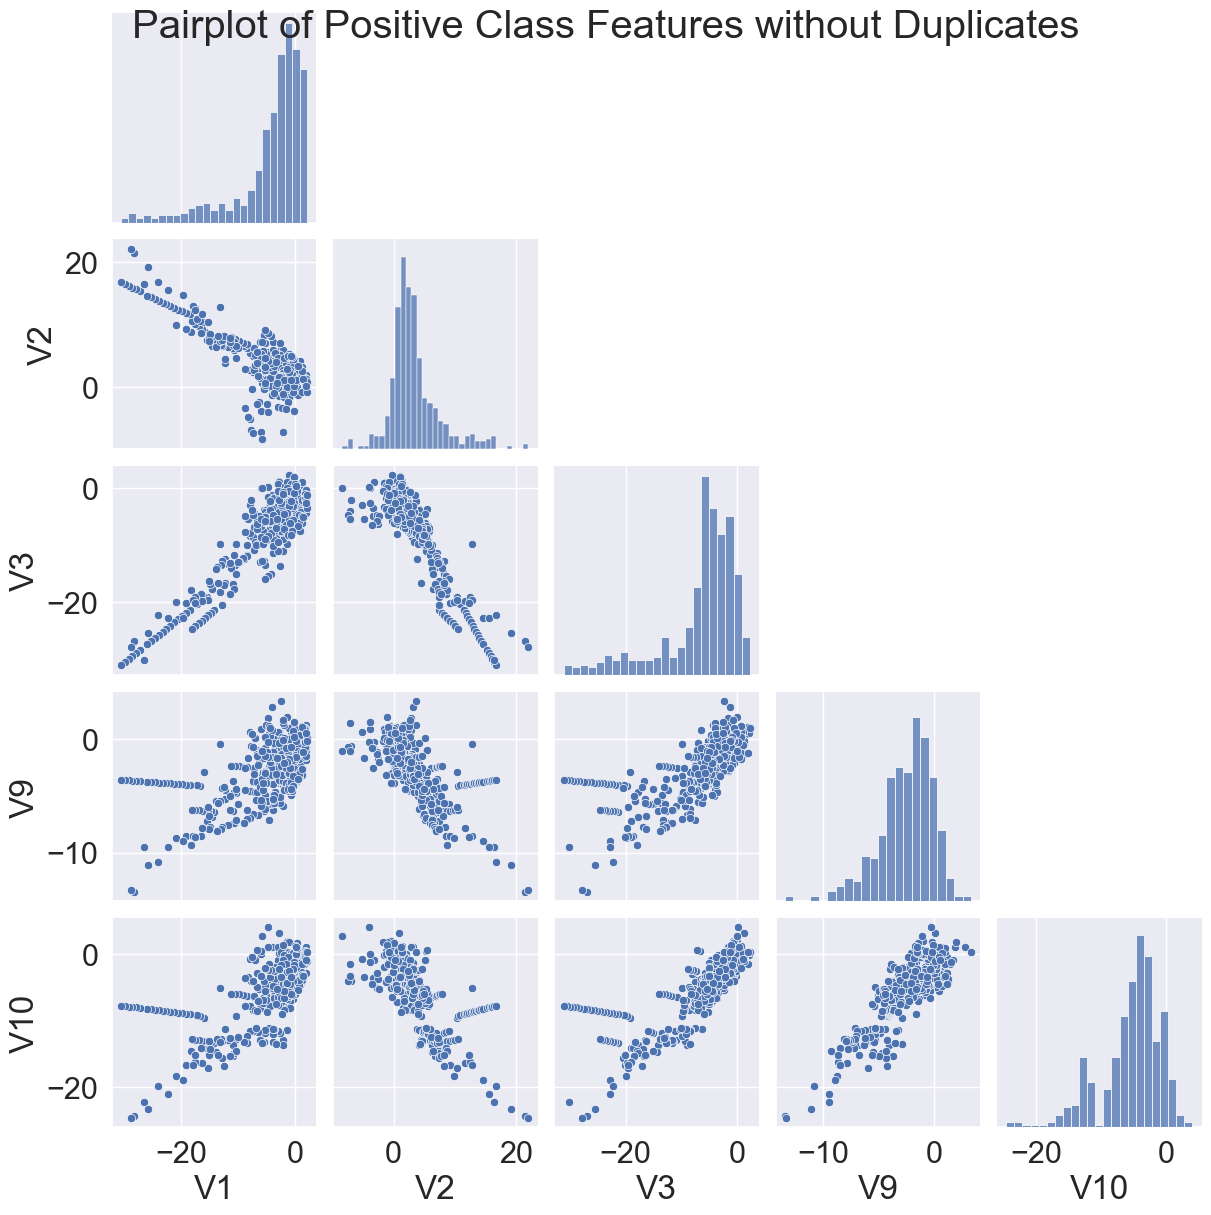

In [ ]:
positive_no_dup_df = dropped_dup_df[dropped_dup_df['Class'] == 1]
fig2 = sns.pairplot(positive_no_dup_df,
             vars=['V1','V2','V3','V9','V10'],
             corner=True)
fig2.fig.suptitle('Pairplot of Positive Class Features without Duplicates', fontsize=20)

There is a concern regarding the synthetic datapoints not accurately portraying the true relationships between the features. There might be datapoints that are just noise to the dataset and are disrupting the oversampling technique to model the correct distribution of the minority class.

Feature Engineering

LDA is considered in this classification project since removing the redundant features can drastically help with the algorithm runtime while highlighting the difference between two classes, thus, resulting in more accurate model.

In [3]:
X = df.drop(['Class', 'Time', 'Amount'], axis=1)
Y = df.Class

As mentioned earlier, the desired predictors for the model should not include Time and Amount as they are likely noise to the dataset.

In [23]:
scaler = StandardScaler()
print(np.linalg.norm(X - scaler.fit_transform(X)))
standardized_X = pd.DataFrame(scaler.fit_transform(X))

1074.5155918772432


Standardization ensures that the features are equally important, which helps with the dimensional reduction of the dataset.

In [35]:
lda = LinearDiscriminantAnalysis()
X_lda = lda.fit_transform(X, Y)

Defining a function to implement Linear Discriminant Analysis in each Kfold.

To address the skewness of the dataset, Synthetic Minority Oversampling TEchnique (SMOTE) is implemented. However, class-weighting might also be an effective method as well.

In [6]:
smote = SMOTE(random_state=0, sampling_strategy=0.5)

def smote_transform(X_train, Y_train):
    X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)
    return X_train_resampled, Y_train_resampled

Models Evaluation

The models' hyperparameters are temporarily tuned to reduce the runtime of the fitting process.

In [4]:
LogisticRegression_model = LogisticRegression(max_iter=5000, tol=1e-3, class_weight="balanced")
RandomForest_model = RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=100, class_weight="balanced")

Accuracy is highly a biased metric since the dataset is super skewed. Precision provide insights to how accurate is the model predictions of the positive class. Sensitivity display how well the model is able to identify the positive class (i.e. the fraudulent class).

In [8]:
LogisticRegression_accuracies = []
LogisticRegression_precisions = []
LogisticRegression_TPRs = []
LogisticRegression_FPRs = []
LogisticRegression_f1_scores = []
LogisticRegression_auc_scores = []
LogisticRegression_avg_precision_scores = []

def LogisticRegression_metrics_appending(Y_test, LogisticRegression_Y_pred, LogisticRegression_Y_pred_proba):
    LogisticRegression_accuracies.append(accuracy_score(Y_test, LogisticRegression_Y_pred))
    LogisticRegression_precisions.append(precision_score(Y_test, LogisticRegression_Y_pred))
    LogisticRegression_TPRs.append(recall_score(Y_test, LogisticRegression_Y_pred, pos_label=1))
    LogisticRegression_FPRs.append(1 - recall_score(Y_test, LogisticRegression_Y_pred, pos_label=0))
    LogisticRegression_f1_scores.append(f1_score(Y_test, LogisticRegression_Y_pred))
    LogisticRegression_auc_scores.append(roc_auc_score(Y_test, LogisticRegression_Y_pred_proba))
    LogisticRegression_avg_precision_scores.append(average_precision_score(Y_test, LogisticRegression_Y_pred_proba))

RandomForest_accuracies = []
RandomForest_precisions = []
RandomForest_TPRs = []
RandomForest_FPRs = []
RandomForest_f1_scores = []
RandomForest_auc_scores = []
RandomForest_avg_precision_scores = []

def RandomForest_metrics_appending(Y_test, RandomForest_Y_pred, RandomForest_Y_pred_proba):
    RandomForest_accuracies.append(accuracy_score(Y_test, RandomForest_Y_pred))
    RandomForest_precisions.append(precision_score(Y_test, RandomForest_Y_pred))
    RandomForest_TPRs.append(recall_score(Y_test, RandomForest_Y_pred, pos_label=1))
    RandomForest_FPRs.append(1 - recall_score(Y_test, RandomForest_Y_pred, pos_label=0))
    RandomForest_f1_scores.append(f1_score(Y_test, RandomForest_Y_pred))
    RandomForest_auc_scores.append(roc_auc_score(Y_test, RandomForest_Y_pred_proba))
    RandomForest_avg_precision_scores.append(average_precision_score(Y_test, RandomForest_Y_pred_proba))

KFold of 10 folds is implemented to insure Bias & Variance are not too high.

In [5]:
kfold = KFold(n_splits=10, shuffle=True, random_state=0)

The models are trained using the sampled dataset and tested with the original dataset to determine their performances.

In [ ]:
LogisticRegression_scores = cross_validate(LogisticRegression_model, X, Y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'))
RandomForest_scores = cross_validate(RandomForest_model, X, Y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'))


print(f"Logistic Regression Mean Recall Score: {LogisticRegression_scores['test_recall'].mean() * 100:.3f}% (+-{LogisticRegression_scores['test_recall'].std() * 100:.3f}%)")
print(f"Logistic Regression Mean F1-score: {LogisticRegression_scores['test_f1'].mean() * 100:.3f}% (+-{LogisticRegression_scores['test_f1'].std() * 100:.3f}%)")

print(f"Random Forest Mean Recall Score: {RandomForest_scores['test_recall'].mean() * 100:.3f}% (+-{RandomForest_scores['test_recall'].std() * 100:.3f}%)")
print(f"Random Forest Mean F1-score: {RandomForest_scores['test_f1'].mean() * 100:.3f}% (+-{RandomForest_scores['test_f1'].std() * 100:.3f}%)")

Logistic Regression mean recall score: 0.8839183673469387
Logistic Regression mean f1-score: 0.12064952769392093
Random Forest mean recall score: 0.7926530612244898
Random Forest mean f1-score: 0.8202033476310735


In [24]:
LogisticRegression_scores = cross_validate(LogisticRegression_model, standardized_X, Y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'))
RandomForest_scores = cross_validate(RandomForest_model, standardized_X, Y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'))


print(f"Logistic Regression Mean Recall Score: {LogisticRegression_scores['test_recall'].mean() * 100:.3f}% (+-{LogisticRegression_scores['test_recall'].std() * 100:.3f}%)")
print(f"Logistic Regression Mean F1-score: {LogisticRegression_scores['test_f1'].mean() * 100:.3f}% (+-{LogisticRegression_scores['test_f1'].std() * 100:.3f}%)")

print(f"Random Forest Mean Recall Score: {RandomForest_scores['test_recall'].mean() * 100:.3f}% (+-{RandomForest_scores['test_recall'].std() * 100:.3f}%)")
print(f"Random Forest Mean F1-score: {RandomForest_scores['test_f1'].mean() * 100:.3f}% (+-{RandomForest_scores['test_f1'].std() * 100:.3f}%)")

Logistic Regression mean recall score: 0.8859591836734694
Logistic Regression mean f1-score: 0.12141684757500926
Random Forest mean recall score: 0.7906938775510204
Random Forest mean f1-score: 0.8177766302625382


In [36]:
LogisticRegression_scores = cross_validate(LogisticRegression_model, X_lda, Y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'))
RandomForest_scores = cross_validate(RandomForest_model, X_lda, Y, cv=10, scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'average_precision'))


print(f"Logistic Regression Mean Recall Score: {LogisticRegression_scores['test_recall'].mean() * 100:.3f}% (+-{LogisticRegression_scores['test_recall'].std() * 100:.3f}%)")
print(f"Logistic Regression Mean F1-score: {LogisticRegression_scores['test_f1'].mean() * 100:.3f}% (+-{LogisticRegression_scores['test_f1'].std() * 100:.3f}%)")

print(f"Random Forest Mean Recall Score: {RandomForest_scores['test_recall'].mean() * 100:.3f}% (+-{RandomForest_scores['test_recall'].std() * 100:.3f}%)")
print(f"Random Forest Mean F1-score: {RandomForest_scores['test_f1'].mean() * 100:.3f}% (+-{RandomForest_scores['test_f1'].std() * 100:.3f}%)")

Logistic Regression mean recall score: 0.882
Logistic Regression mean f1-score: 0.16044752430981507
Random Forest mean recall score: 0.7559183673469387
Random Forest mean f1-score: 0.6887693676696001


The mean and standard deviation is provided for better understanding of the models' performances, however, displaying the distributions might provide better insights to Bias & Variance in each model.